In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel("PCS_TEST_DETERMINSTIC.xls")
data.columns = data.columns.str.strip()
data

,Arrival no,Arrival time (sec),Base station,Call duration (sec),velocity (km/h)
0,1,0.000000,18,76.133611,125.934254
1,2,0.067744,7,159.056244,95.510881
2,3,0.559184,6,179.465053,127.757456
3,4,0.625319,14,163.108320,134.310552
4,5,1.345066,2,95.054472,112.272359
...,...,...,...,...,...
9995,9996,13692.269647,4,116.119337,119.601001
9996,9997,13692.593630,16,37.970440,114.278648
9997,9998,13694.615122,3,31.919218,123.540944
9998,9999,13695.404091,12,386.621127,123.507947


## Input Modelling

### Distribution of interarrival times

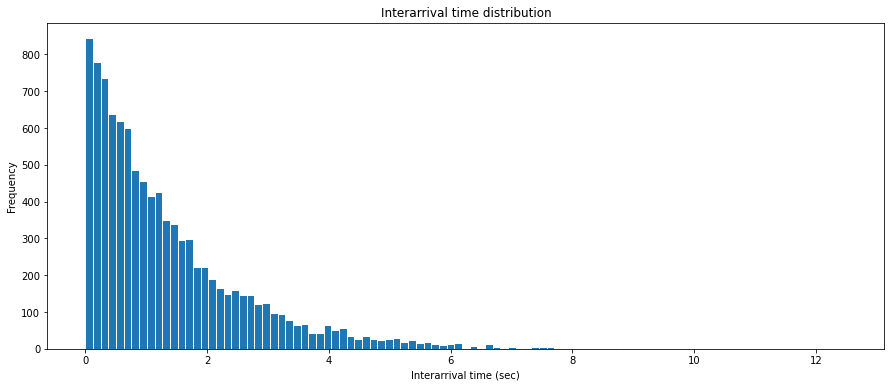

In [3]:
# set figure size
plt.figure(figsize=(15, 6))

# calculate interarrival times
int_arr = np.diff(data['Arrival time (sec)'])
# calculate k
k = int(np.sqrt(len(int_arr)))
# plot interarrival times
plt.hist(int_arr, bins=k, edgecolor='white')
plt.xlabel('Interarrival time (sec)')
plt.ylabel('Frequency')
plt.title('Interarrival time distribution')
plt.show()

#### Maximum Likelihood Estimation <br>
By observation, distribution of interarrival times is similar to an exponential distribution. Estimate the parameters of the distribution.

In [4]:
# estimate of parameters
beta = np.mean(int_arr)
print('Mean of Interarrival time distribution: ' + str(beta))

Mean of Interarrival time distribution: 1.3698169264765245


#### Goodness-of-fit test for exponential distribution <br>
We use the Chi-square test to verify this hypothesis that the interarrival times are distributed according to an exponential distribution.

In [5]:
# Calculate values of intervals
intervals = []
p = 1/k
for i in range(k):
    intervals.append(beta*np.log(1/(1-i*p)))

# calculate N values
N = [0]*k
for val in int_arr:
    if val >= intervals[k-1]:
        N[k-1] += 1
    else:
        for i in range(k-1):
            if val >= intervals[i] and val < intervals[i+1]:
                N[i] += 1

# calculate test statistic
np_val = p*len(int_arr)
test_statistic = np.sum([((N[i] - np_val)**2)/np_val for i in range(k)])
critical_value = stats.chi2.ppf(0.95, k-1-1)
print('Test statistic: ' + str(test_statistic))
print('Critical value (alpha=0.05): ' + str(critical_value))
if test_statistic > critical_value:
    print('Test statistic is greater than critical value. Reject null hypothesis.')
else:
    print('Test statistic is less than critical value. Do not reject null hypothesis.')

Test statistic: 95.58415841584156
Critical value (alpha=0.05): 120.98964369660958
Test statistic is less than critical value. Do not reject null hypothesis.


### Distribution of starting Base Stations

C:\Users\yc000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


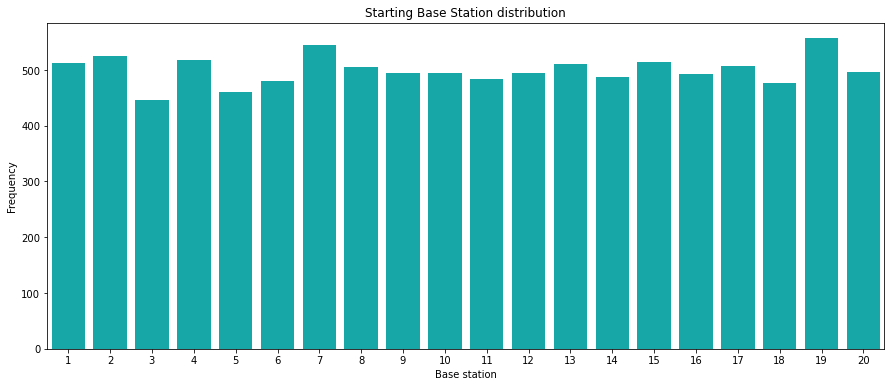

In [6]:
# set figure size
plt.figure(figsize=(15, 6))

k = 20
# plot starting base station distribution
sns.countplot(data['Base station'], color='c')
plt.xlabel('Base station')
plt.ylabel('Frequency')
plt.title('Starting Base Station distribution')
plt.show()

#### Goodness-of-fit test for uniform distribution <br>
We use the Chi-square test to verify this hypothesis that the starting base stations are distributed according to an uniform distribution.

In [7]:
# calculate N values
N = [0]*k
for val in data['Base station']:
    for i in range(k):
        if val == i+1:
            N[i] += 1

# calculate test statistic
np_val = len(data)/20
test_statistic = np.sum([((N[i] - np_val)**2)/np_val for i in range(k)])
critical_value = stats.chi2.ppf(0.95, k-1)
print('Test statistic: ' + str(test_statistic))
print('Critical value (alpha=0.05): ' + str(critical_value))
if test_statistic > critical_value:
    print('Test statistic is greater than critical value. Reject null hypothesis.')
else:
    print('Test statistic is less than critical value. Do not reject null hypothesis.')

Test statistic: 25.656000000000002
Critical value (alpha=0.05): 30.14352720564616
Test statistic is less than critical value. Do not reject null hypothesis.


### Distribution of Call Duration

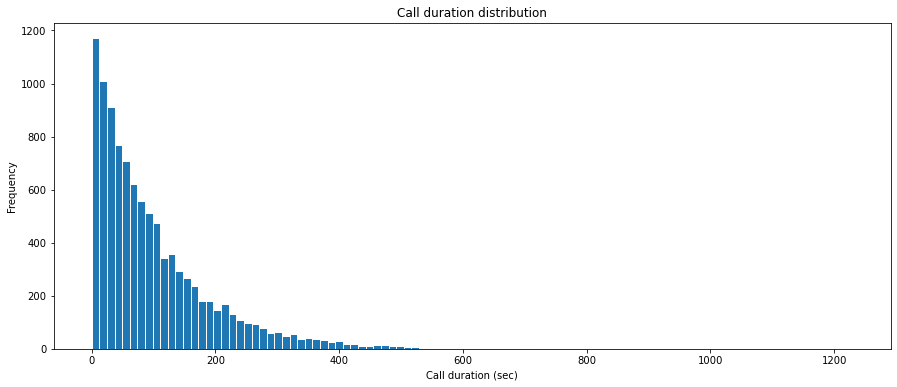

In [8]:
# set figure size
plt.figure(figsize=(15, 6))

k = int(np.sqrt(len(data)))
# minimum call duration is not 0, translate values to 0
translation = min(data['Call duration (sec)'])
# plot starting base station distribution
plt.hist(data['Call duration (sec)']-translation, bins=k, edgecolor='white')
plt.xlabel('Call duration (sec)')
plt.ylabel('Frequency')
plt.title('Call duration distribution')
plt.show()

#### Maximum Likelihood Estimation <br>
By observation, distribution of call duration times translated is similar to an exponential distribution. Estimate the parameters of the distribution.

In [9]:
# estimate of parameters
beta = np.mean(data['Call duration (sec)']-translation)
print('Mean of Call duration distribution: ' + str(beta))

Mean of Call duration distribution: 99.83194913549607


#### Goodness-of-fit test for exponential distribution <br>
We use the Chi-square test to verify this hypothesis that the call duration times are distributed according to an exponential distribution.

In [10]:
# Calculate values of intervals
intervals = []
p = 1/k
for i in range(k):
    intervals.append(beta*np.log(1/(1-i*p)))

# calculate N values
N = [0]*k
for val in data['Call duration (sec)']-translation:
    if val >= intervals[k-1]:
        N[k-1] += 1
    else:
        for i in range(k-1):
            if val >= intervals[i] and val < intervals[i+1]:
                N[i] += 1

# calculate test statistic
np_val = p*len(data)
test_statistic = np.sum([((N[i] - np_val)**2)/np_val for i in range(k)])
critical_value = stats.chi2.ppf(0.95, k-1-1)
print('Test statistic: ' + str(test_statistic))
print('Critical value (alpha=0.05): ' + str(critical_value))
if test_statistic > critical_value:
    print('Test statistic is greater than critical value. Reject null hypothesis.')
else:
    print('Test statistic is less than critical value. Do not reject null hypothesis.')

Test statistic: 97.01999999999997
Critical value (alpha=0.05): 122.10773460981942
Test statistic is less than critical value. Do not reject null hypothesis.


### Distribution of Velocity

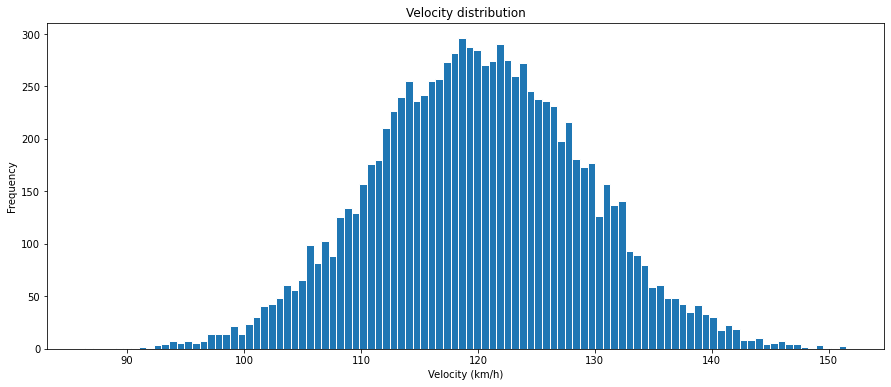

In [11]:
# set figure size
plt.figure(figsize=(15, 6))

k = int(np.sqrt(len(data)))
# plot starting base station distribution
plt.hist(data['velocity (km/h)'], bins=k, edgecolor='white')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Frequency')
plt.title('Velocity distribution')
plt.show()

#### Maximum Likelihood Estimation <br>
By observation, distribution of velocity is similar to a normal distribution. Estimate the parameters of the distribution.

In [12]:
# estimate of parameters
mu = np.mean(data['velocity (km/h)'])
variance = np.var(data['velocity (km/h)'])
print('Mean of Velocity distribution: ' + str(mu))
print('Variance of Velocity distribution: ' + str(variance))

Mean of Velocity distribution: 120.07209801685805
Variance of Velocity distribution: 81.33527102508008


#### Goodness-of-fit test for normal distribution <br>
We use the Chi-square test to verify this hypothesis that the velocities are distributed according to a normal distribution.

In [13]:
# normal distribution hypothesis testing
test_statistic, p_value = stats.normaltest(data['velocity (km/h)'])
print('Test statistic: ' + str(test_statistic))
print('P-value: ' + str(p_value))
if p_value < 1e-3:
    print('P-value is less than 1e-3. Reject null hypothesis.')
else:
    print('P-value is greater than 1e-3. Do not reject null hypothesis.')

Test statistic: 0.9232644183720664
P-value: 0.6302540989879483
P-value is greater than 1e-3. Do not reject null hypothesis.
